In [1]:
from causallearn.search.ScoreBased.GES import ges
from causallearn.graph.GeneralGraph import GeneralGraph
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv("C:/Users/17172/Desktop/CausalLearning/sample_data/COVID3_4Nodes3.dat")
df = df.replace(to_replace='No', value=0)
df = df.replace(to_replace='Yes', value=1)
df = df.replace(to_replace='Negtive', value=0)
df = df.replace(to_replace='Positive', value=1)
df

,ED_Visit,Dyspnea,COPD,COVID
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
49995,0,1,0,1
49996,0,0,0,0
49997,0,0,0,0
49998,0,0,0,0


In [3]:
X = df.to_numpy()
start = time.time()
Record = ges(X, score_func="local_score_BDeu")
print(time.time()-start)

[[ 0  0  0  0]
 [ 0  0  0 -1]
 [ 0  0  0  0]
 [ 0  1  0  0]]
[[ 0 -1  0  0]
 [ 1  0  0 -1]
 [ 0  0  0  0]
 [ 0 -1  0  0]]
[[ 0 -1  0  0]
 [-1  0  1  1]
 [ 0 -1  0  0]
 [ 0 -1  0  0]]
backward
0.7211728096008301


In [4]:
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pydot
import io

In [5]:
labels = df.columns
labels

Index(['ED_Visit', 'Dyspnea', 'COPD', 'COVID'], dtype='object')

In [6]:
plt.rcParams['figure.dpi'] = 300

In [7]:
# targetNode = Record['G'].get_node(name='X31')
# listOfParents = Record['G'].get_parents(node=targetNode)
# for i in range(len(listOfParents)):
#     parentString = listOfParents[i].get_name()
#     parentString = parentString.replace('X', '')
#     print(labels[int(parentString)-1])


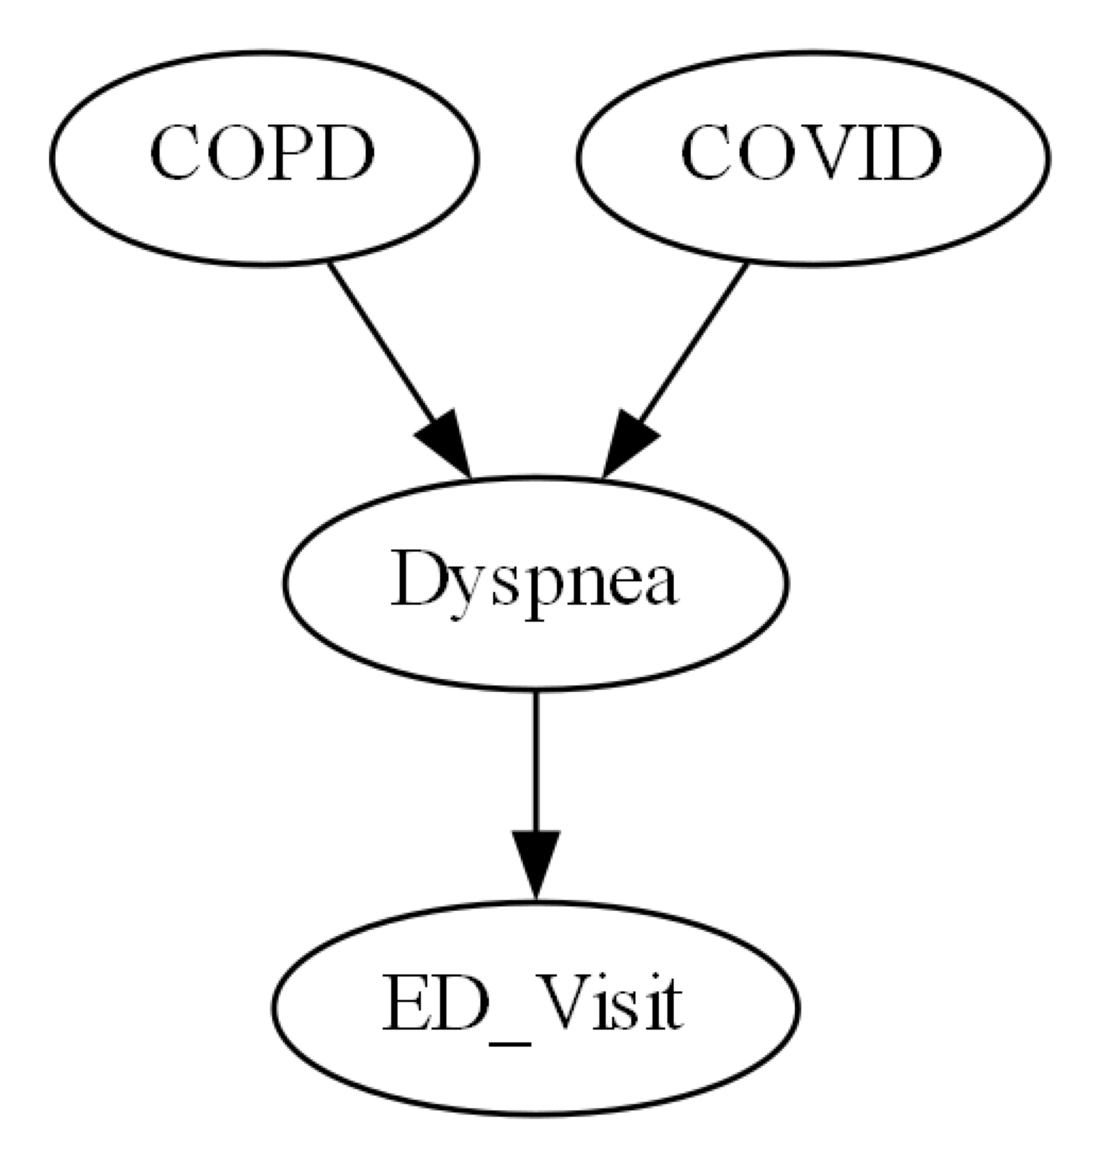

In [8]:
pyd = GraphUtils.to_pydot(Record['G'], labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()